In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib as mpl
import pandas as pd
import scipy as sp

In [3]:
pwd

'/Users/amnon/git/paper-daycare'

In [4]:
ca.set_log_level(11)

In [5]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data

In [55]:
gan=ca.read_amplicon('data/gan-normalized.biom','data/gan-normalized_sample.txt',feature_metadata_file='data/gan-normalized_feature.txt',min_reads=10,normalize=100)

2021-10-04 10:26:08 INFO loaded 268 samples, 928 features
2021-10-04 10:26:08 WARNING Do you forget to normalize your data? It is required before running this function
2021-10-04 10:26:08 INFO After filtering, 268 remain.


In [56]:
gan=gan.sort_samples('pn_ID')
gan=gan.sort_samples('Time')

# Age related bacteria
## look only at first timepoint, so single sample per individual, without effect of entering kindergarten

In [57]:
tt=gan.filter_samples('Time',1)
dd=tt.correlation('age_months',random_seed=2020)

2021-10-04 10:26:13 INFO After filtering, 564 remain.
2021-10-04 10:26:14 INFO Positive correlated features : 103. Negative correlated features : 13. total 116


In [58]:
# taxonomy colors

taxcolors={}
taxcolors['_c__Clostridia']='g'
taxcolors['_c__Bacteroidia']='b'
taxcolors['_c__Gammaproteobacteria']='r'
taxcolors['_c__Bacilli']='y'
taxcolors['_c__Erysipelotrichi']='cyan'
taxcolors['_c__Coriobacteriia']='magenta'
taxcolors['_c__Betaproteobacteria']='black'
taxcolors['Other']='grey'

alltaxcolors={}
for ctax in gan.feature_metadata['class'].unique():
    alltaxcolors[ctax]='grey'
    
alltaxcolors.update(taxcolors)


2021-10-04 10:26:25 WARNING You need to set up jupyter notebook with `%matplotlib notebook`


/Users/amnon/git/calour/calour/heatmap/heatmap.py:308: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(bad_color)


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

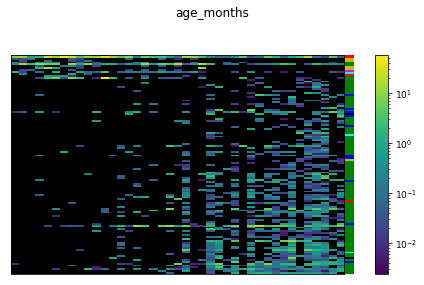

In [59]:
dd=dd.sort_samples('age_months')
f=dd.plot('age_months',gui='jupyter',bary_fields=['class'],bary_label=False,bary_colors=alltaxcolors)
f.figure.savefig('figures/heatmap-age-dependent.pdf')

## And save the legend for the taxonomy colors
(we cut it from this figure)

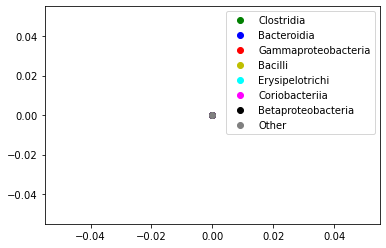

In [60]:
f=plt.figure()
labels=[]
for ck,cv in taxcolors.items():
    plt.plot([0],[0],'o',c=cv)
    labels.append(ck.split('_')[-1])
plt.legend(labels)
f.savefig('figures/tax-colors.pdf')